In [1]:
%load_ext lab_black
import warnings

warnings.filterwarnings("ignore")
from datetime import datetime
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_2019 = pd.read_csv("../data/AB_NYC_2019.csv")
data_2019.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [3]:
# Replacing the missing values for numerical columns with mean for the 2019 data
data_2019["number_of_reviews"] = data_2019["number_of_reviews"].fillna(
    data_2019["number_of_reviews"].mean()
)
data_2019["price"] = data_2019["price"].fillna(data_2019["price"].mean())
data_2019["minimum_nights"] = data_2019["minimum_nights"].fillna(
    data_2019["minimum_nights"].mean()
)
data_2019["reviews_per_month"] = data_2019["reviews_per_month"].fillna(
    data_2019["reviews_per_month"].mean()
)
data_2019["calculated_host_listings_count"] = data_2019[
    "calculated_host_listings_count"
].fillna(data_2019["calculated_host_listings_count"].mean())
data_2019["availability_365"] = data_2019["availability_365"].fillna(
    data_2019["availability_365"].mean()
)
data_2019["last_review"] = data_2019["last_review"].fillna(12 / 18 / 2022)
data_2019["name"] = data_2019["name"].fillna(data_2019["name"].mode()[0])
data_2019["neighbourhood_group"] = data_2019["neighbourhood_group"].fillna(
    data_2019["neighbourhood_group"].mode()[0]
)
data_2019["host_name"] = data_2019["host_name"].fillna(data_2019["host_name"].mode()[0])

data_2019.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Text(0.5, 0, 'Neighbourhood Group')

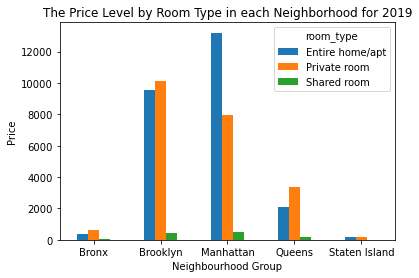

In [4]:
# Barplot for The Price Level by Room Type in each neighborhood
neighborhood_counts = (
    data_2019.groupby(["neighbourhood_group", "room_type"])["neighbourhood_group"]
    .size()
    .unstack(fill_value=0)
)
room_type = neighborhood_counts.plot.bar(rot=0)
plt.title("The Price Level by Room Type in each Neighborhood for 2019")
plt.ylabel("Price")
plt.xlabel("Neighbourhood Group")

In [5]:
# Top 10 neighbourhoods by calculated host listing count

neighborhood_top10 = (
    data_2019.groupby(["neighbourhood"])["calculated_host_listings_count"]
    .count()
    .to_frame()
    .sort_values(["calculated_host_listings_count"], ascending=[False])
    .head(10)
)
neighborhood_top10

,calculated_host_listings_count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564


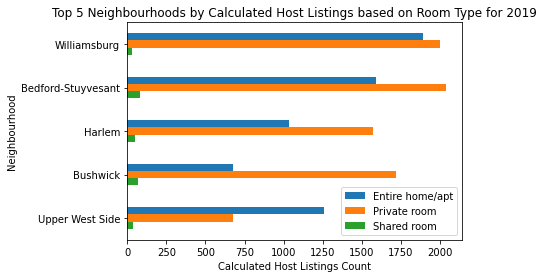

In [6]:
# Top 5 Neighbourhoods by Calculated Host Listings based on Room Type
neighborhood_top5 = neighborhood_top10.head(5)
neighborhood_top5_2 = (
    data_2019.groupby(["neighbourhood", "room_type"])["room_type"]
    .size()
    .unstack(fill_value=20)
)
neighborhood_top5_count = pd.merge(
    neighborhood_top5, neighborhood_top5_2, how="left", on=["neighbourhood"]
)
neighborhood_top5_count = neighborhood_top5_count[
    ["Entire home/apt", "Private room", "Shared room"]
]
neighborhood = neighborhood_top5_count.plot(kind="barh")
plt.title(
    "Top 5 Neighbourhoods by Calculated Host Listings based on Room Type for 2019"
)
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Neighbourhood")
ax = plt.gca()
ax.invert_yaxis()

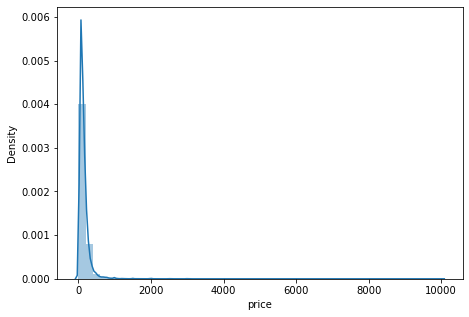

Highest allowed 873.1831964283906
Lowest allowed -567.7418220547329


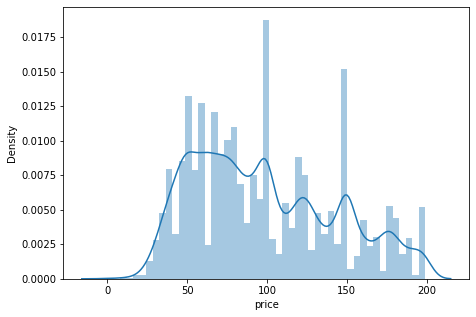

In [7]:
# Removing outliers in the variable "Price"
# Trimming the outliers
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(data_2019["price"])
plt.show()
print("Highest allowed", data_2019["price"].mean() + 3 * data_2019["price"].std())
print("Lowest allowed", data_2019["price"].mean() - 3 * data_2019["price"].std())
# Note that the average Airbnb price per night in NYC is $143
new_data = data_2019[(data_2019["price"] < 200)]
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(new_data["price"])
plt.show()

Text(0, 0.5, 'Price')

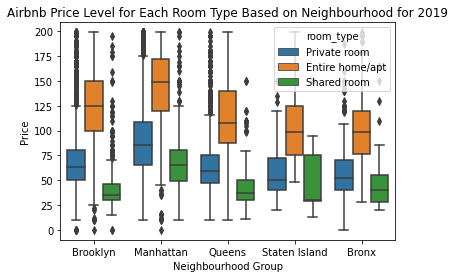

In [8]:
# Boxplot for Airbnb Price Level for Each Room Type Based on Neighbourhood
Boxplot = sns.boxplot(
    y="price", data=new_data, x="neighbourhood_group", hue="room_type"
)
plt.title("Airbnb Price Level for Each Room Type Based on Neighbourhood for 2019")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")

In [9]:
# Save plots to artifacts
room_type = room_type.get_figure()
room_type.savefig("../artifacts/neighborhood_top5_count.png")
Boxplot = Boxplot.get_figure()
Boxplot.savefig("../artifacts/Boxplot.png")
neighborhood = neighborhood.get_figure()
neighborhood.savefig("../artifacts/neighborhood.png")